# Mastering the grammar

## Introduction

- [scatter plot](#Building-a-scatterplot)
- [adding smoother and facet](#Adding-complexity)
- [precisely defined grammer](#Components-of-the-layered-grammer)

## Building a scatterplot

use dataset `mpg`

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res=180)

# multiplot function from Cookbook for R by Winston Chang
# modified by Yuanxing Cheng
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL, res=180, width=0) {
    library(grid)

    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)

    numPlots = length(plots)
    if (width>0){
        options(repr.plot.width=width, repr.plot.height=2*max(numPlots%/%ncol,1), repr.plot.res=res)
    } else{
        options(repr.plot.width=min(9,3*ncol), repr.plot.height=2*max(numPlots%/%ncol,1), repr.plot.res=res)   
    }

    # If layout is NULL, then use 'ncol' to determine layout
    if (is.null(layout)) {
        # Make the panel
        # ncol: Number of columns of plots
        # nrow: Number of rows needed, calculated from # of column
        layout <- matrix(
            seq(1, ncol * ceiling(numPlots/ncol)),
            ncol = ncol, nrow = ceiling(numPlots/ncol),
            byrow=TRUE # set byrow=TRUE will make the subplots listed by row
        )
    }

    if (numPlots==1) {
        print(plots[[1]])
    } else {
        # Set up the page
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

        # Make each plot, in the correct location
        for (i in 1:numPlots) {
            # Get the i,j matrix positions of the regions that contain this subplot
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            print(
                plots[[i]],
                vp = viewport(
                    layout.pos.row = matchidx$row,
                    layout.pos.col = matchidx$col
                )
            )
        }
    }
}
myTheme = theme(
    plot.title = element_text(size = rel(0.5)), 
    axis.title = element_text(size = rel(0.8)), 
    legend.title = element_text(size = rel(0.8))
)

head(mpg)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


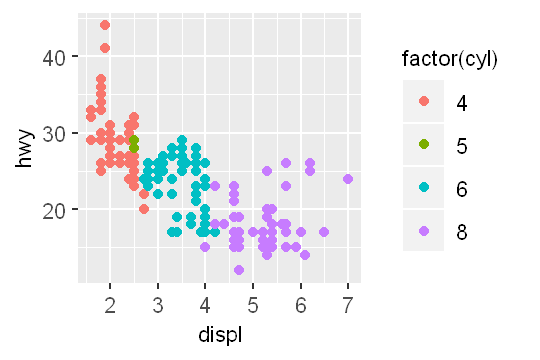

In [2]:
ggplot(mpg,aes(displ,hwy,color=factor(cyl))) + 
geom_point() + myTheme

Let's see what's underneath the whole process.

### Mapping aesthetics to data

**aesthetics**: the properties that be be perceived on the graphic. And it can be 

- mapped to a variable
- set to a constant

For the previous one:

- `displ` → horizontal position
- `hwy` → vertical posiiton
- `cyl` → color

then we have

| X    | Y    | color |
| :--: | :--: | :---: |
| 1.8  | 29   | 4     |
| 1.8  | 29   | 4     |
| 2.0  | 31   | 4     |
| 2.0  | 30   | 4     |
| 2.8  | 36   | 6     |
| ...  | ...   | ...    |

Here we can draw some meaningless plots, if you have to.

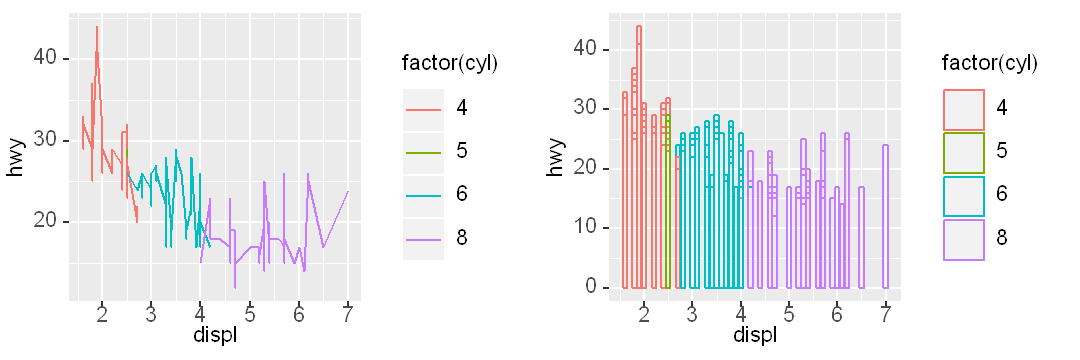

In [3]:
g1 <- ggplot(mpg,aes(displ,hwy,color=factor(cyl))) + 
geom_line() + myTheme
g2 <- ggplot(mpg,aes(displ,hwy,color=factor(cyl))) + 
geom_bar(stat='identity', position='identity', fill=NA) + myTheme

multiplot(g1,g2,ncol=2)

**geoms**: define the type of the current plot process

Complex plots with multiple geoms are created by them.

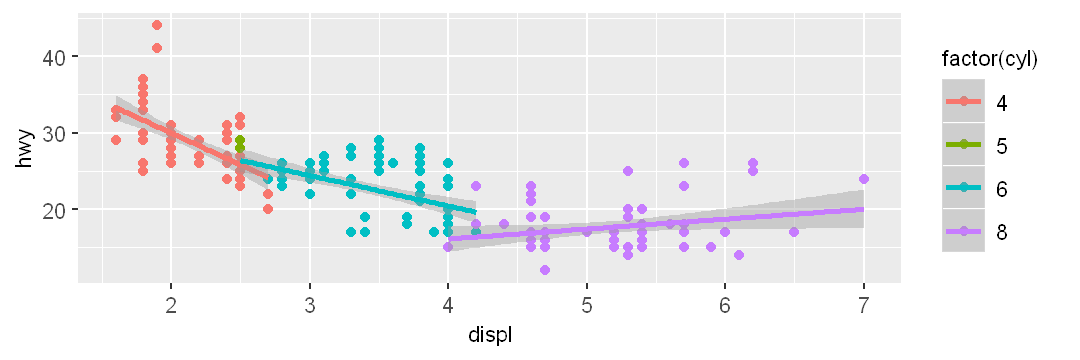

In [4]:
ggplot(mpg,aes(displ,hwy,color=factor(cyl))) + 
geom_point() + 
geom_smooth(method='lm') + myTheme

`method=lm` meaning using linear method, see Chap02 for more details.

### Scaling

**Scaling**: convert the data units, using scales, to graphical units, like pixels and colors. Using command `vignette('gplot2-specs')` to see the documents. Or find the html file, `"..\R\library\ggplot2\doc\ggplot2-specs.html"`

Default scaling is linear, a mapping from the range of the data to range $[0,1]$, since we're using ggplot **grid** system.

Another important system is the **coord** system, in most cases the Cartesian coordinates.

After mapping the constant variables, we have the final result.

|   x   |   y   |  color  | size | shape |
|:-----:|:-----:|:-------:|:----:|:-----:|
| 0.037 | 0.531 | #F8766D |   1  |   19  |
| 0.037 | 0.531 | #F8766D |   1  |   19  |
| 0.074 | 0.594 | #F8766D |   1  |   19  |
|  ...  |  ...  |   ...   |  ... |  ...  |

When plotting, we need:

- point geoms to represent data
- axes generated by scale
- legends generated by coordinate system
- other annotation like background and title

## Adding complexity

Start with this

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


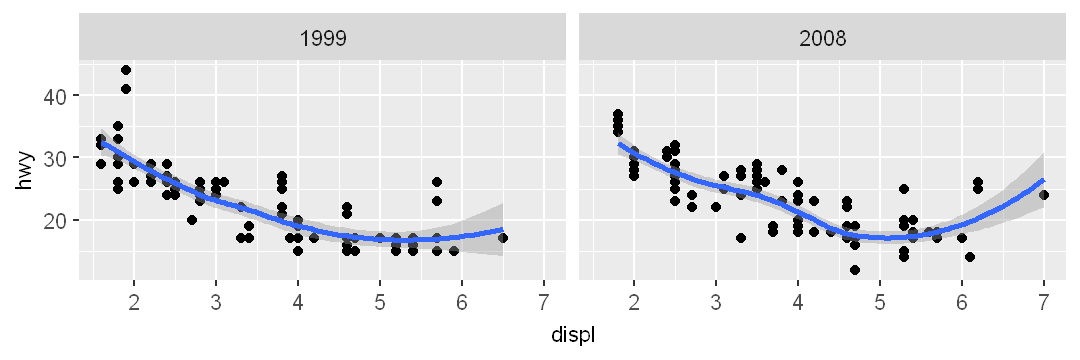

In [6]:
ggplot(mpg, aes(displ, hwy)) + 
geom_point() +
geom_smooth() + 
facet_wrap(~year) + myTheme

Facet panel in each layer can have its own dataset. Point layer has already been explained above.

The smoother layer is complicated. It displays a statistical transformation of the data. Process:

- map the data to aesthetics
- facet datasets
- scale transformation, more in Chap 12.6.1
- a statistical transformation manipulate the scale-transformed data and return the required statistics
- coordinate transformations
- compute other aesthetics
- each scale is trained on every dataset so as to overlay different layers, more in Chap14
- the scales map the data values into aesthetic values
- render the data using geoms

<img src="./assets/plotGenerationProcess.png" width=400px>

## Components of the layered grammar

The data, mappings, stat, geom and position adjustment form a layer. A plot may have multiple layers. The layered grammar defines a plot as the combination of: 

- default dataset and set of mappings from variables to aesthetics
- one or more layers, each composed of a geometric object, a statistical transformation, a position adjustment, and optionally, a dataset and aesthetic mappings
- one scale for each aesthetic mapping
- a coordinate system
- the facetting specification

### Layers

Five parts:

- Data
- Aesthetic mappings
- A statistical transformation (stat)
- A geometric object (geom)
- A position adjustment

More in Chap11, and key points are covered in Chap04-08

### Scales

It controls the mapping from data to aesthetic attributes. Here're some examples.

<img src="./assets/scaleLegends1.png" width=600px>

- continuous variable mapped to size
- continuous variable mapped to colour
- discrete variable mapped to shape
- discrete variable mapped to colour

Here the scale is a function, and its inverse, and some parameters. The inverse function is used to draw a guide to help read values. The guides are either axes (for position scales) or legends (for everything else).

### Coordinate system

**Coord** maps the position of objects onto the plane of the plot. See the following three:

|   Cartesian   |   semi-log   |  polar  |
|:-----:|:-----:|:-------:|
| <img src="./assets/Coord1.png" width=200px> | <img src="./assets/Coord2.png" width=200px> | <img src="./assets/Coord3.png" width=200px> |

### Facetting

This is a powerful tool when investigating whether patterns hold across all conditions.